# 1 Introduction

## 1.1 Project Overview

## 1.2 Project Objective

## 1.3 Evaluation Methodology

# 2 Data Collection

## 2.1 Description of the Dataset

## 2.2 Acquiring the Dataset

In [10]:
from sklearn.datasets import fetch_20newsgroups

In [11]:
# Fetch the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# 3 Exploratory Data Analysis

## 3.1 Text Statistics

In [16]:
# Number of documents
print('Number of documents in the training set:', len(newsgroups_train.data))
print('Number of documents in the test set:', len(newsgroups_test.data))


Number of documents in the training set: 11314
Number of documents in the test set: 7532


In [18]:
# Get average number of words per document
def average_words(documents):
    total_words = 0
    for document in documents:
        total_words += len(document.split())
    return total_words / len(documents)

# Average number of words per document
print('Average number of words per document in the training set:', average_words(newsgroups_train.data))
print('Average number of words per document in the test set:', average_words(newsgroups_test.data))

Average number of words per document in the training set: 287.4701255082199
Average number of words per document in the test set: 277.92671269251196


In [19]:
# Get vocabulary size
def vocabulary_size(documents):
    vocabulary = set()
    for document in documents:
        for word in document.split():
            vocabulary.add(word)
    return len(vocabulary)

# Vocabulary size
print('Vocabulary size in the training set:', vocabulary_size(newsgroups_train.data))
print('Vocabulary size in the test set:', vocabulary_size(newsgroups_test.data))

Vocabulary size in the training set: 280308
Vocabulary size in the test set: 201144


## 3.2 Class Distribution

In [15]:
# Print the categories
print(newsgroups_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [32]:
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/qy/1t1mmmfn3ys3lwxkx12904f80000gn/T/ipykernel_2533/1505719282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


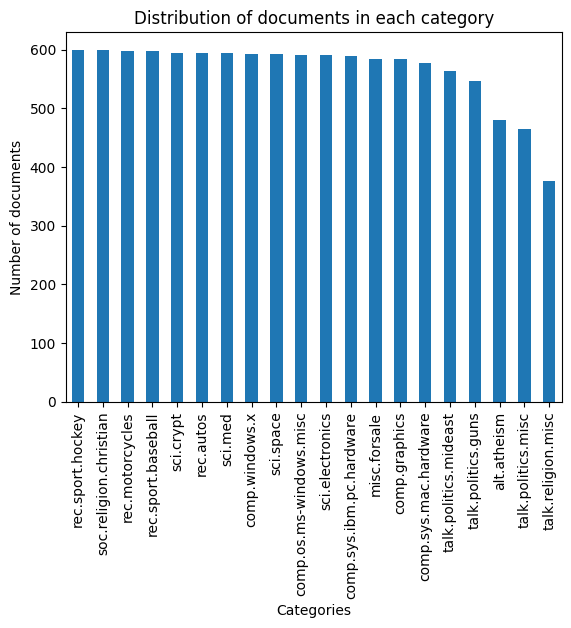

In [34]:
# Create a series from the target variable
category_counts = pd.Series(newsgroups_train.target).map(lambda x: newsgroups_train.target_names[x]).value_counts()
category_counts.plot(kind='bar')

# Set the title and labels
plt.xlabel('Categories')
plt.ylabel('Number of documents')
plt.title('Distribution of documents in each category')

# Show the plot
plt.show()

## 3.3 Word Frequency Analysis

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
vectorizer.fit(newsgroups_train.data)

# Transofrm the training data
X_train = vectorizer.transform(newsgroups_train.data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Calculate the word frequency
word_frequencies = X_train.sum(axis=0)

# Create a dataframe to store the word frequencies
df_word_frequencies = pd.DataFrame({"Word": feature_names, "Frequency": word_frequencies.flat})

# Sort the dataframe by word frequency
df_word_frequencies = df_word_frequencies.sort_values(by="Frequency", ascending=False)

# Print the 20 most frequent words
print(df_word_frequencies.head(20))

        Word  Frequency
114455   the     146532
115475    to      75064
89362     of      69034
30827     ax      62406
28146    and      57957
66608     in      49401
68532     is      43480
114440  that      39264
68766     it      33638
56283    for      28600
128402   you      26682
56979   from      22670
50527    edu      21321
89860     on      20491
114731  this      20121
32311     be      19285
29241    are      18616
87949    not      18424
62221   have      18074
124616  with      17325


## 3.4 N-gram Analysis

In [39]:
# Create a CountVectorizer object with ngram_range=(2, 2)
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer on the training data
vectorizer.fit(newsgroups_train.data)

# Transform the training data
X_train = vectorizer.transform(newsgroups_train.data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Calculate the bigram frequency
bigram_frequencies = X_train.sum(axis=0)

# Create a dataframe to store the bigram frequencies
df_bigram_frequencies = pd.DataFrame({"Bigram": feature_names, "Frequency": bigram_frequencies.flat})

# Sort the dataframe by bigram frequency
df_bigram_frequencies = df_bigram_frequencies.sort_values(by="Frequency", ascending=False)

# Print the 20 most frequent bigrams
print(df_bigram_frequencies.head(20))


               Bigram  Frequency
171701          ax ax      56319
665262         of the      15462
487052         in the      10916
868275     subject re       7420
941597         to the       6066
482910     in article       5858
673967         on the       5809
513619          it is       4814
641304   nntp posting       4794
935552          to be       4791
729646   posting host       4786
391408        for the       4418
587245         max ax       4331
898148       that the       4322
171919         ax max       4314
477105         if you       3819
134178        and the       3757
1021835      with the       3138
925454        this is       3090
509273         is the       2963


In [40]:
# Create a CountVectorizer object with ngram_range=(3, 3)
vectorizer = CountVectorizer(ngram_range=(3, 3))

# Fit the vectorizer on the training data
vectorizer.fit(newsgroups_train.data)

# Transform the training data
X_train = vectorizer.transform(newsgroups_train.data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Calculate the trigram frequency
trigram_frequencies = X_train.sum(axis=0)

# Create a dataframe to store the trigram frequencies
df_trigram_frequencies = pd.DataFrame({"Trigram": feature_names, "Frequency": trigram_frequencies.flat})

# Sort the dataframe by trigram frequency
df_trigram_frequencies = df_trigram_frequencies.sort_values(by="Frequency", ascending=False)

# Print the 20 most frequent trigrams
print(df_trigram_frequencies.head(20))


                            Trigram  Frequency
284922                     ax ax ax      50668
1127650           nntp posting host       4786
1036870                   max ax ax       4257
285094                    ax ax max       4200
285623                    ax max ax       4179
1240949  organization university of       1657
1945589           writes in article       1384
1216883                  one of the        791
695499                  g9v g9v g9v        658
1691039                 there is no        626
298797                   be able to        589
117941                  a86 a86 a86        481
1940965               would like to        471
482949                 cso uiuc edu        451
531477      distribution world nntp        441
908942                    it is not        441
1937013          world nntp posting        441
1626161               the fact that        441
1497875                 some of the        420
1592357                  that it is        417


## 3.5 Correlation Analysis

# 4 Data Pre-processing Pipeline

## 4.1 Text Cleaning

In [ ]:
import re

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)

    # Remove leading and trailing whitespaces
    text = text.strip()

    return text

In [ ]:
# Clean the training data


# 5 Baseline Model

## 5.1 Model Training

## 5.2 Model Evaluation

# 6 BERT Model

## 6.1 Data Pre-processing

## 6.2 Model Training

## 6.3 Model Evaluation